# Global Terrorism Database EDA Project

The Global Terrorism Database (GTD) has made available data on terrorist events around the world from 1970 through 2021.
<br>Data can be requested here: https://www.start.umd.edu/gtd/contact/download

In this project, I would like to do some data manipulation in Python and try to answer the following questions:

1. How has the number of terrorist activities changed over the years? Are there certain regions where this trend is different from the global averages?

2. Is the number of incidents and the number of casualties correlated? Any irregularities or outliers?

3. What are the most common methods of attacks? Does it differ in various regions or in time?

4. Plot the locations of attacks on a map to visualise their regional spread.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bar_chart_race as bcr
import seaborn as sns
import geopandas as gpd

%matplotlib inline

df1 contains data from 1970 to 2022; df2 contains data for the first six months of 2021.

In [2]:
df1 = pd.read_excel("globalterrorismdb_0522dist.xlsx")
df2 = pd.read_excel("globalterrorismdb_2021Jan-June_1222dist.xlsx")

In [3]:
print(df1.columns.tolist())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [4]:
print(df2.columns.tolist())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

A sanity check to make sure the 2 dataframes have the exact same columns in the exact same order before combining them.

In [5]:
df1.columns.tolist() == df2.columns.tolist()

True

In [6]:
df = pd.concat([df1,df2],ignore_index=True)
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214661,202106300023,2021,6,30,NaN,0,NaT,4,Afghanistan,6,...,NaN,"""Gunmen blow up power pylon in Parwan,"" Afghan...","""Provinces hit by blackout after power pylon d...",NaN,START Primary Collection,-9,-9,0,-9,NaN
214662,202106300029,2021,6,30,06/30/2021,0,NaT,138,Myanmar,5,...,NaN,"""Spring Revolution Daily News for 16-30 June 2...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
214663,202106300030,2021,6,30,NaN,1,2021-07-08,147,Nigeria,11,...,NaN,"""Boko Haram Releases Abducted Catholic Priest ...","""Kidnapped Maiduguri Catholic Priest regains f...","""ISWAP-Boko Haram Abduct Catholic Priest In Bo...",START Primary Collection,0,0,0,0,NaN
214664,202106300038,2021,6,30,NaN,0,NaT,45,Colombia,3,...,NaN,"""Two dead and one wounded after clashes betwee...",NaN,NaN,START Primary Collection,0,0,0,0,NaN


In [7]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
214661,202106300023,2021,6,30,NaN,0,NaT,4,Afghanistan,6,...,NaN,"""Gunmen blow up power pylon in Parwan,"" Afghan...","""Provinces hit by blackout after power pylon d...",NaN,START Primary Collection,-9,-9,0,-9,NaN
214662,202106300029,2021,6,30,06/30/2021,0,NaT,138,Myanmar,5,...,NaN,"""Spring Revolution Daily News for 16-30 June 2...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
214663,202106300030,2021,6,30,NaN,1,2021-07-08,147,Nigeria,11,...,NaN,"""Boko Haram Releases Abducted Catholic Priest ...","""Kidnapped Maiduguri Catholic Priest regains f...","""ISWAP-Boko Haram Abduct Catholic Priest In Bo...",START Primary Collection,0,0,0,0,NaN
214664,202106300038,2021,6,30,NaN,0,NaT,45,Colombia,3,...,NaN,"""Two dead and one wounded after clashes betwee...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
214665,202107020037,2021,6,30,NaN,0,NaT,138,Myanmar,5,...,There is doubt that this incident meets terror...,"""Spring Revolution Daily News for 2-7 July 202...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


Checking on the missing data:
<br>Since this is a fairly large dataset, we can potentially use the below method to filter out some columns that aren't very useful for analysis due to too much missing data.
<br>Refer to https://www.start.umd.edu/gtd/downloads/Codebook.pdf for column header name explanations

In [8]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing*100.00)) 


eventid-0.0%
iyear-0.0%
imonth-0.0%
iday-0.0%
approxdate-93.91007425488898%
extended-0.0%
resolution-97.69083133798551%
country-0.0%
country_txt-0.0%
region-0.0%
region_txt-0.0%
provstate-0.0%
city-0.19891366122255036%
latitude-2.201559632172771%
longitude-2.2020254721287955%
specificity-0.00046583995602470814%
vicinity-0.0%
location-67.62738393597496%
summary-30.801337892353704%
crit1-0.0%
crit2-0.0%
crit3-0.0%
doubtterr-0.0%
alternative-83.00243168457044%
alternative_txt-83.00243168457044%
multiple-0.0013975198680741244%
success-0.0%
suicide-0.0%
attacktype1-0.0%
attacktype1_txt-0.0%
attacktype2-95.83911751278731%
attacktype2_txt-95.83911751278731%
attacktype3-99.6627318718381%
attacktype3_txt-99.6627318718381%
targtype1-0.0%
targtype1_txt-0.0%
targsubtype1-5.600327951329041%
targsubtype1_txt-5.600327951329041%
corp1-19.814968369466985%
target1-0.2967400519877391%
natlty1-0.9661520687952446%
natlty1_txt-0.9661520687952446%
targtype2-92.95044394547809%
targtype2_txt-92.95044394547809%

Now we start answering the questions.

### 1.How has the number of terrorist activities changed over the years? Are there certain regions where this trend is different from the global averages?

In [9]:
df_1 = df[["eventid","iyear","country_txt","region_txt","attacktype1_txt","attacktype2_txt","attacktype3_txt"]]
df_1.head(10)

,eventid,iyear,country_txt,region_txt,attacktype1_txt,attacktype2_txt,attacktype3_txt
0,197000000001,1970,Dominican Republic,Central America & Caribbean,Assassination,NaN,NaN
1,197000000002,1970,Mexico,North America,Hostage Taking (Kidnapping),NaN,NaN
2,197001000001,1970,Philippines,Southeast Asia,Assassination,NaN,NaN
3,197001000002,1970,Greece,Western Europe,Bombing/Explosion,NaN,NaN
4,197001000003,1970,Japan,East Asia,Facility/Infrastructure Attack,NaN,NaN
5,197001010002,1970,United States,North America,Armed Assault,NaN,NaN
6,197001020001,1970,Uruguay,South America,Assassination,NaN,NaN
7,197001020002,1970,United States,North America,Bombing/Explosion,NaN,NaN
8,197001020003,1970,United States,North America,Facility/Infrastructure Attack,NaN,NaN
9,197001030001,1970,United States,North America,Facility/Infrastructure Attack,NaN,NaN


In [10]:
bars = df_1.groupby("iyear")["eventid"].count()

<Axes: title={'center': 'Number of attacks by year, 1970-2021'}, xlabel='Year', ylabel='Number of attacks'>

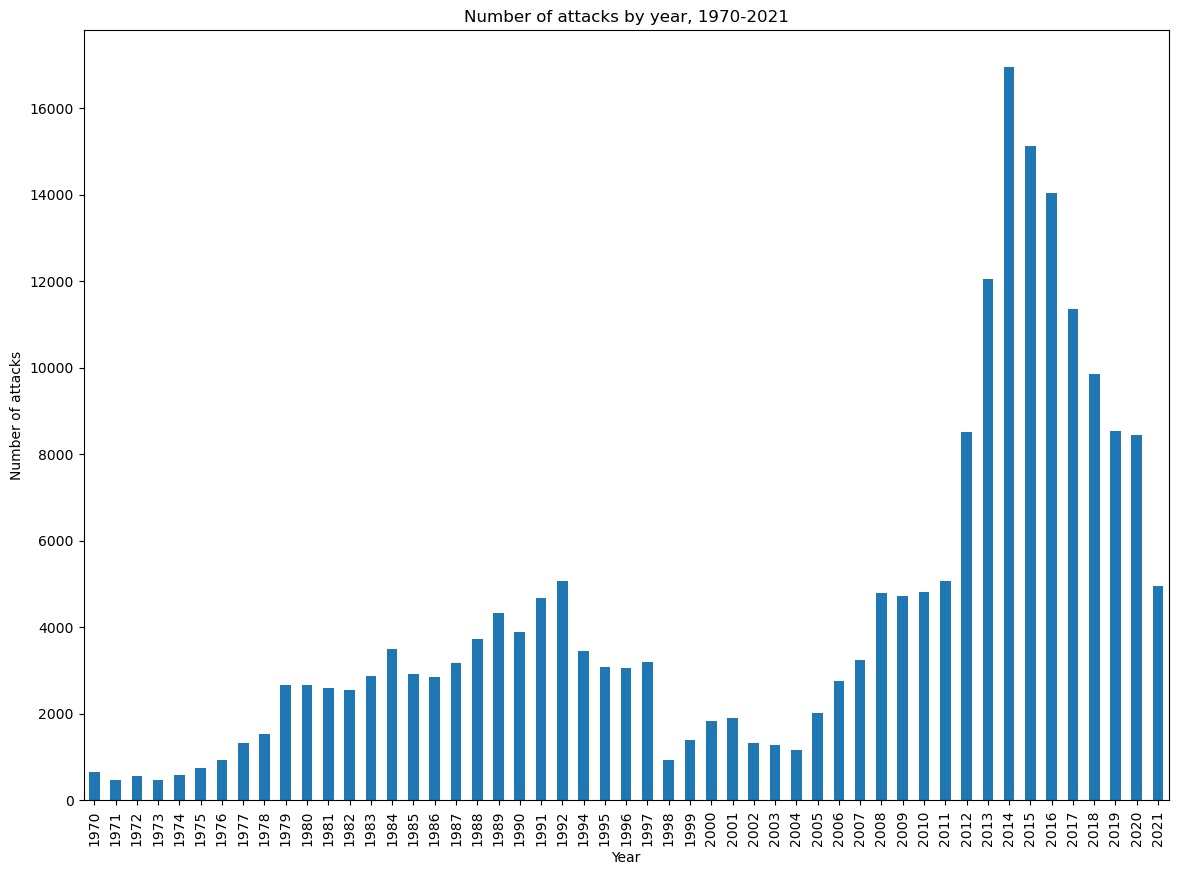

In [11]:
bars.plot.bar(xlabel="Year",ylabel="Number of attacks",title="Number of attacks by year, 1970-2021",figsize=(14,10))

In [12]:
trend = df_1.pivot_table("eventid",index="iyear",columns="region_txt",aggfunc="count").fillna(0)
trend.head()

region_txt,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
iyear,,,,,,,,,,,,
1970,1.0,7.0,0.0,2.0,12.0,28.0,472.0,65.0,1.0,10.0,3.0,50.0
1971,1.0,5.0,0.0,1.0,5.0,55.0,247.0,24.0,0.0,6.0,2.0,125.0
1972,8.0,3.0,0.0,0.0,1.0,53.0,73.0,33.0,1.0,15.0,4.0,376.0
1973,1.0,6.0,0.0,2.0,1.0,19.0,64.0,83.0,1.0,2.0,4.0,290.0
1974,1.0,11.0,0.0,4.0,2.0,42.0,111.0,81.0,2.0,3.0,7.0,317.0


In [13]:
trend["Global_average"]=trend.mean(axis=1)
trend.tail()

region_txt,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe,Global_average
iyear,,,,,,,,,,,,,
2017,13.0,4.0,8.0,7.0,112.0,4183.0,105.0,179.0,3432.0,1024.0,2000.0,297.0,947.000000
2018,21.0,15.0,7.0,6.0,72.0,2740.0,110.0,303.0,3287.0,875.0,2212.0,205.0,821.083333
2019,5.0,15.0,3.0,18.0,44.0,2175.0,108.0,276.0,3039.0,715.0,1944.0,195.0,711.416667
2020,21.0,13.0,6.0,21.0,60.0,1802.0,130.0,267.0,3418.0,419.0,1997.0,284.0,703.166667
2021,1.0,2.0,0.0,5.0,16.0,1262.0,59.0,147.0,1853.0,373.0,1137.0,105.0,413.333333


<Axes: title={'center': 'Number of terrorist attacks per region,1970-2021'}, xlabel='year', ylabel='Number of terrorist attacks'>

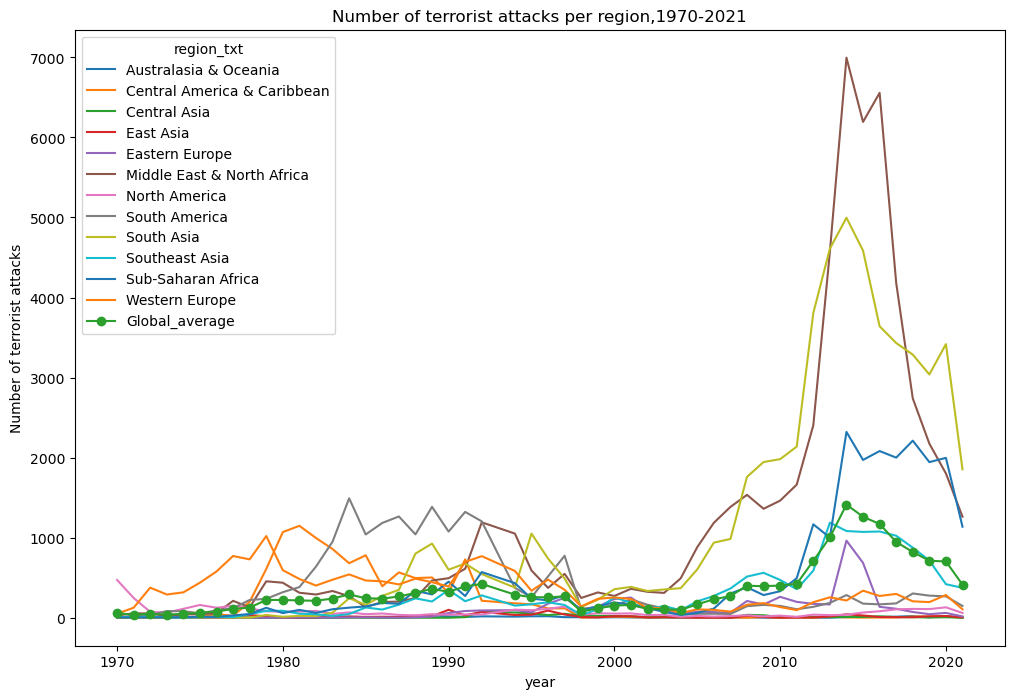

In [14]:
trend.plot(xlabel="year",ylabel="Number of terrorist attacks",
           title="Number of terrorist attacks per region,1970-2021",
           style=['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'o-'],figsize=(12,8))

<Axes: title={'center': 'Number of terrorist attacks per region,1970-2021'}, xlabel='year', ylabel='Number of terrorist attacks'>

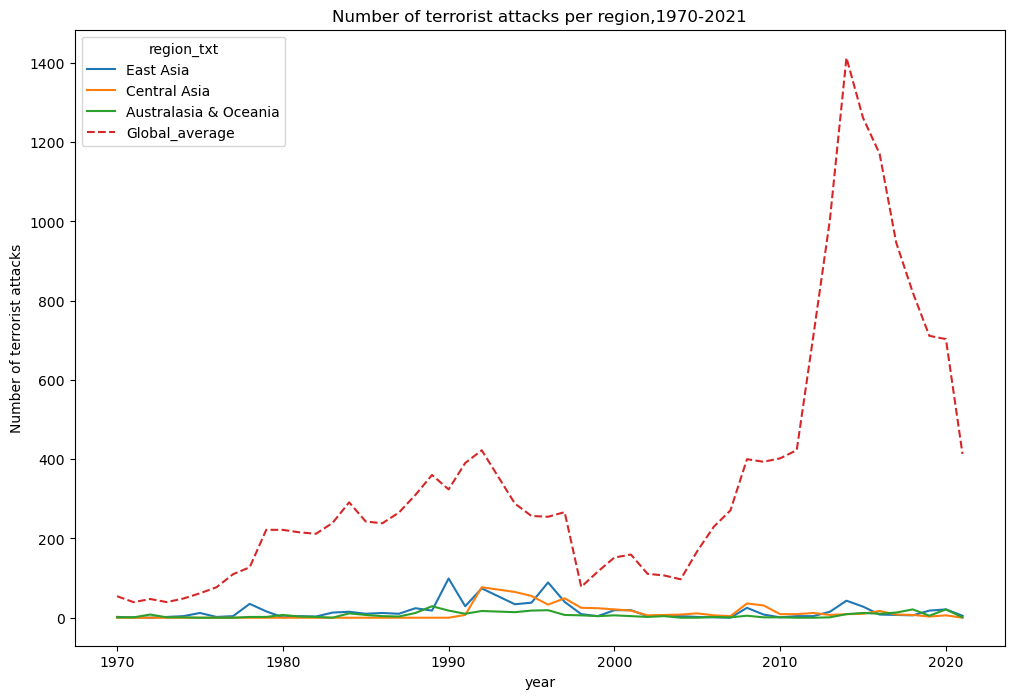

In [15]:
trend[['East Asia', 'Central Asia', 'Australasia & Oceania','Global_average']].plot(xlabel="year",
                                                                                    ylabel="Number of terrorist attacks",
                                                                                    title="Number of terrorist attacks per region,1970-2021",
                                                                                    style=['-', '-', '-', '--'],figsize=(12,8))

<Axes: title={'center': 'Number of terrorist attacks per region,1970-2021'}, xlabel='year', ylabel='Number of terrorist attacks'>

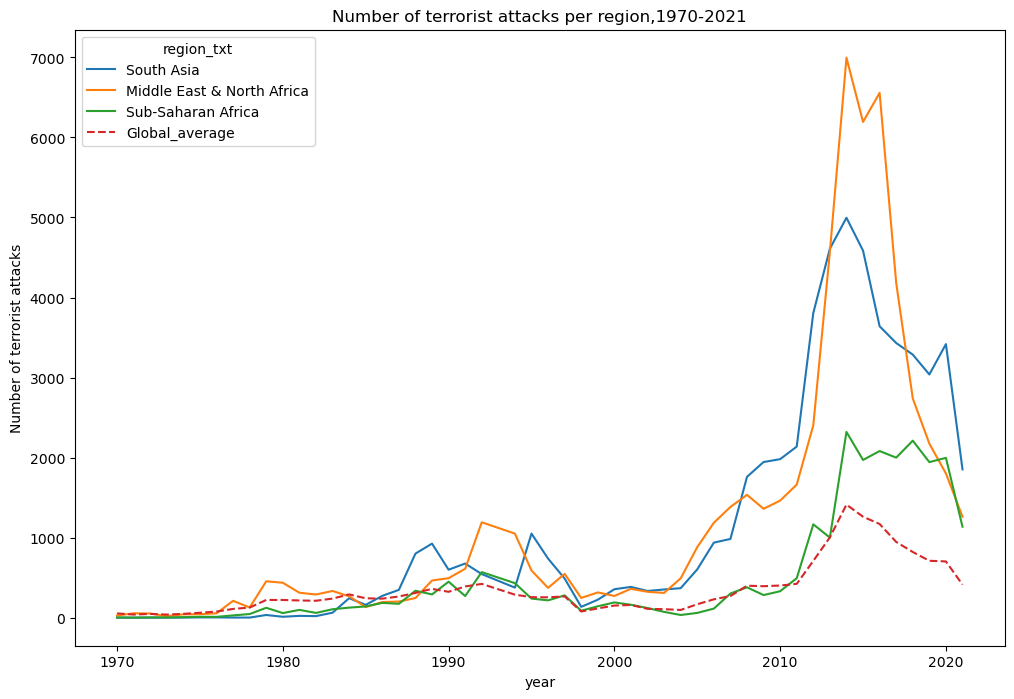

In [16]:
trend[['South Asia', 'Middle East & North Africa', 'Sub-Saharan Africa','Global_average']].plot(xlabel="year",
                                                                                    ylabel="Number of terrorist attacks",
                                                                                    title="Number of terrorist attacks per region,1970-2021",
                                                                                    style=['-', '-', '-', '--'],figsize=(12,8))

Now we create a bar chart race to better show the trend by region over time

In [17]:
df_race = trend.apply(pd.to_numeric, errors='coerce', axis=1).drop(columns="Global_average")

In [18]:
cumulative_attacks_df = df_race.cumsum()
cumulative_attacks_df.index

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021],
      dtype='int64', name='iyear')

In [19]:
bcr.bar_chart_race(df=cumulative_attacks_df, filename=None,
                    period_length=1000, 
                    title="Terrorist attacks by region, 1970-2021", 
                    perpendicular_bar_func='median',dpi=144)

#Note:After running this cell, it takes about 30 seconds for the video to show.

C:\Users\Nicger\miniconda3\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
C:\Users\Nicger\miniconda3\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


#### Conclusion: 
Since the 70s, there has been a notable rise in attacks on a global scale with a slight recede between 1998 and 2004. Attacks began to rise sharply in South Asia, the Middle East & North Africa around 2003 and peaked in 2014.
On the other hand, the number of attacks in East Asia, Central Asia, Australasia & Oceania has consistently been lower than the global average.

### 2.Is the number of incidents and the number of casualties correlated? Any irregularities or outliers?

In [20]:
df_2 = df[["eventid","iyear","imonth","iday","region_txt","nkill"]].fillna(0)
df_2.head(10)

,eventid,iyear,imonth,iday,region_txt,nkill
0,197000000001,1970,7,2,Central America & Caribbean,1.0
1,197000000002,1970,0,0,North America,0.0
2,197001000001,1970,1,0,Southeast Asia,1.0
3,197001000002,1970,1,0,Western Europe,0.0
4,197001000003,1970,1,0,East Asia,0.0
5,197001010002,1970,1,1,North America,0.0
6,197001020001,1970,1,2,South America,0.0
7,197001020002,1970,1,2,North America,0.0
8,197001020003,1970,1,2,North America,0.0
9,197001030001,1970,1,3,North America,0.0


To create a general heatmap, we select columns that are purely numeric and have no more than 10% missing data (refer to the missing data check earlier)

In [21]:
pd.set_option('display.max_columns', None)
df.select_dtypes(include="number")

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,2,18.456792,-69.951164,1.0,0,1,1,1,0,NaN,0.0,1,0,1,NaN,NaN,14,68.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1,197000000002,1970,0,0,0,130,1,19.371887,-99.086624,1.0,0,1,1,1,0,NaN,0.0,1,0,6,NaN,NaN,7,45.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,1.0,1.0,0.0,NaN,NaN,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,0,1,1,1
2,197001000001,1970,1,0,0,160,5,15.478598,120.599741,4.0,0,1,1,1,0,NaN,0.0,1,0,1,NaN,NaN,10,54.0,217.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-9,-9,1,1
3,197001000002,1970,1,0,0,78,8,37.997490,23.762728,1.0,0,1,1,1,0,NaN,0.0,1,0,3,NaN,NaN,7,46.0,217.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-9,-9,1,1
4,197001000003,1970,1,0,0,101,4,33.580412,130.396361,1.0,0,1,1,1,-9,NaN,0.0,1,0,7,NaN,NaN,7,46.0,217.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214661,202106300023,2021,6,30,0,4,6,35.054772,69.196838,1.0,0,1,1,1,0,NaN,0.0,1,0,3,NaN,NaN,21,107.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6,16.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,-99.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9,-9,0,-9
214662,202106300029,2021,6,30,0,138,5,23.986739,97.897143,1.0,0,1,1,1,0,NaN,0.0,1,0,6,NaN,NaN,8,50.0,138.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1.0,1.0,0.0,-99.0,NaN,0.0,NaN,NaN,NaN,NaN,4.0,0.0,-9,-9,0,-9
214663,202106300030,2021,6,30,1,147,11,11.572869,13.014035,4.0,0,1,1,1,0,NaN,0.0,1,0,6,NaN,NaN,15,85.0,147.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1.0,1.0,0.0,NaN,9.0,0.0,NaN,NaN,NaN,NaN,2.0,1.0,0,0,0,0
214664,202106300038,2021,6,30,0,45,3,3.104189,-76.333069,4.0,0,1,1,1,0,NaN,0.0,0,0,3,NaN,NaN,20,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6,16.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


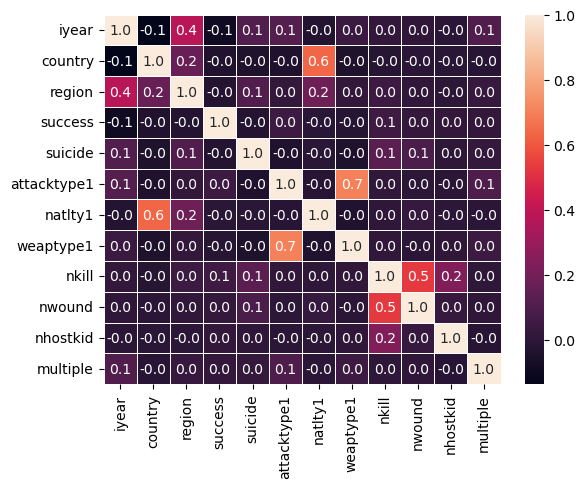

In [22]:
sns.heatmap(df[['iyear', 'country', 'region', 'success', 'suicide', 'attacktype1', 'natlty1', 'weaptype1', 'nkill','nwound','nhostkid','multiple']].corr(numeric_only=True),
            annot=True, fmt=".1f", linewidth=0.5)
plt.show()

    Strongly correlated: Nationality of Target/Victim vs country, Attack Type vs Weapon Type,
    Moderately correlated:Total Number of Injured vs Total Number of Fatalities 

In [23]:
corr = df_2.groupby(["iyear"]).agg({'nkill' : 'sum', 'eventid' : 'count'})
corr.head()

,nkill,eventid
iyear,,
1970,174.0,651
1971,173.0,471
1972,485.0,567
1973,370.0,473
1974,539.0,581


In [24]:
corr.corr()

,nkill,eventid
nkill,1.000000,0.969736
eventid,0.969736,1.000000


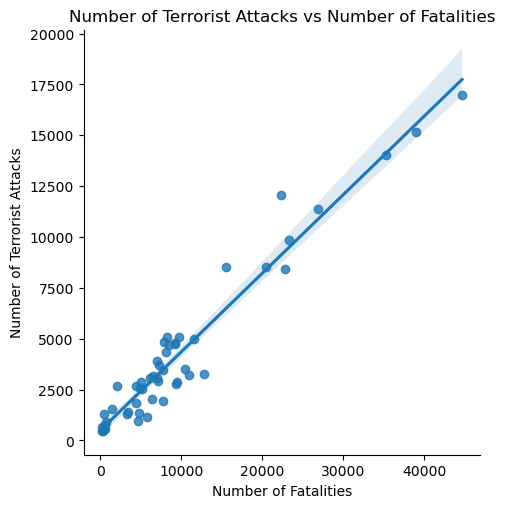

In [25]:
ax = sns.lmplot(x="nkill", y="eventid",data=corr,height=5)
ax.set(xlabel="Number of Fatalities",
       ylabel="Number of Terrorist Attacks",
       title="Number of Terrorist Attacks vs Number of Fatalities")

Let's focus on regional correlation

In [26]:
corr_region = df_2.groupby(["region_txt","iyear"]).agg({'nkill' : 'sum', 'eventid' : 'count'})
corr_region=corr_region.groupby("region_txt").apply(lambda x: x.corr()).unstack().iloc[:,1].sort_values(ascending=False).reset_index(name="Correlation")
corr_region

,region_txt,Correlation
0,Middle East & North Africa,0.966363
1,South America,0.946324
2,Sub-Saharan Africa,0.939359
3,South Asia,0.931327
4,Eastern Europe,0.875085
5,Central America & Caribbean,0.831422
6,Central Asia,0.822683
7,Southeast Asia,0.777946
8,Western Europe,0.584461
9,Australasia & Oceania,0.373755


In [27]:
corr_2 = df.groupby(["iyear","region_txt"]).agg({'nkill' : 'sum', 'eventid' : 'count'})
corr_2.reset_index(inplace=True)
corr_2.head(10)

,iyear,region_txt,nkill,eventid
0,1970,Australasia & Oceania,0.0,1
1,1970,Central America & Caribbean,3.0,7
2,1970,East Asia,0.0,2
3,1970,Eastern Europe,0.0,12
4,1970,Middle East & North Africa,1.0,28
5,1970,North America,34.0,472
6,1970,South America,11.0,65
7,1970,South Asia,4.0,1
8,1970,Southeast Asia,41.0,10
9,1970,Sub-Saharan Africa,1.0,3


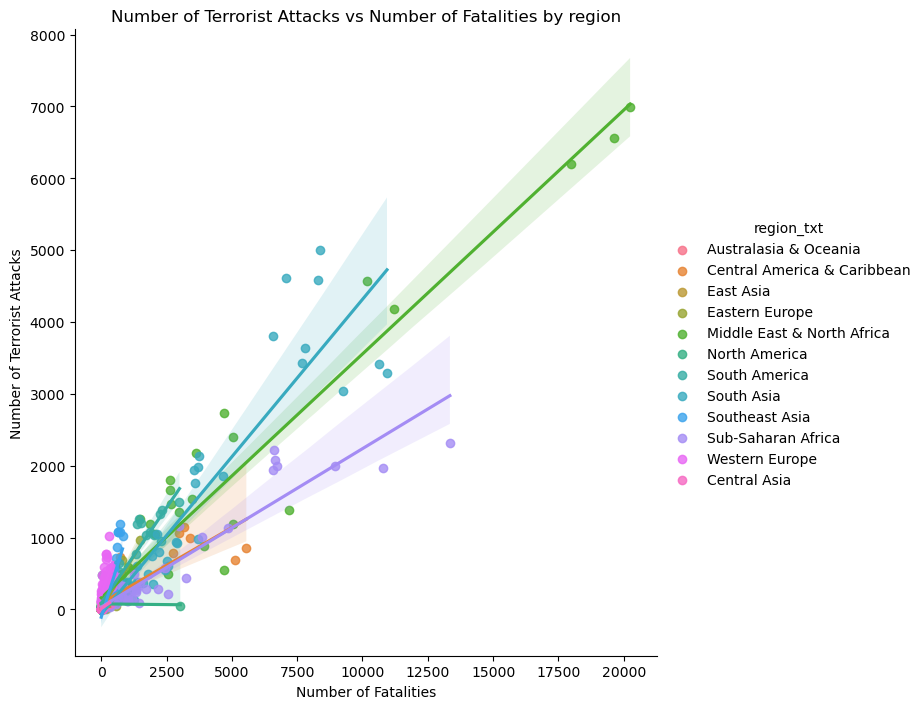

In [28]:
ax = sns.lmplot(x="nkill", y="eventid",hue="region_txt",data=corr_2,height=7)

ax.set(xlabel="Number of Fatalities",
       ylabel="Number of Terrorist Attacks",
       title="Number of Terrorist Attacks vs Number of Fatalities by region")

The above graph is not very clear. To better illustrate the correlation of each region, we can divide it into several subplots.

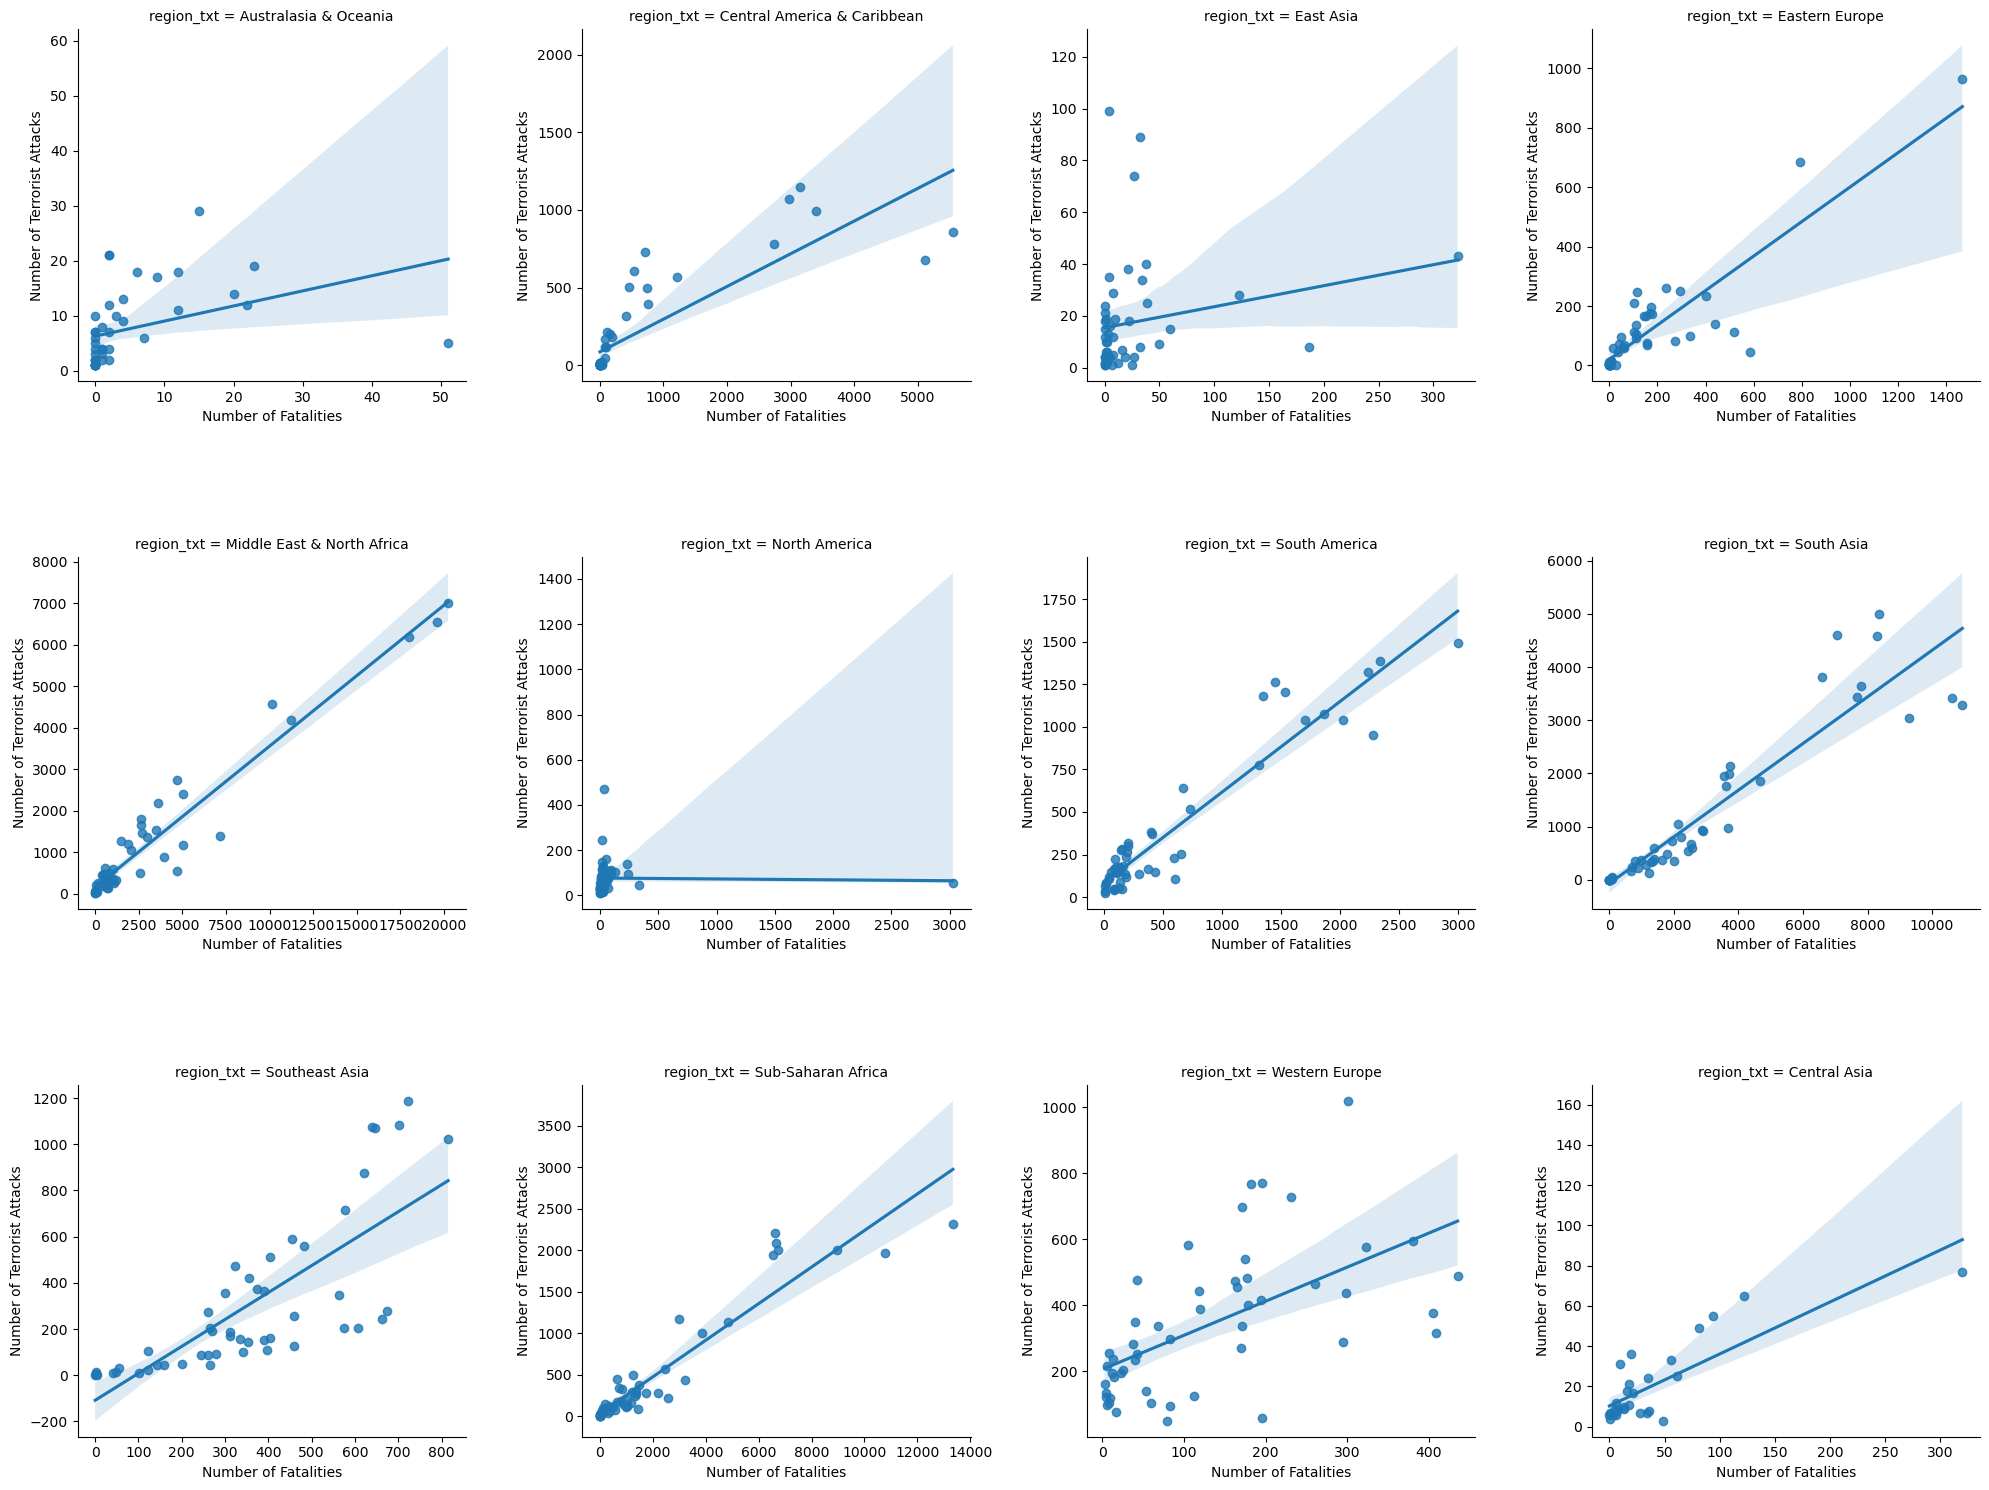

In [29]:
ax=sns.lmplot(
    data=corr_2,x="nkill", y="eventid",
    col="region_txt",
    col_wrap=4,height=5,
    facet_kws=dict(sharex=False, sharey=False)
)

plt.subplots_adjust(hspace=0.5,wspace=0.3)

ax.set(xlabel="Number of Fatalities",
       ylabel="Number of Terrorist Attacks")
    


Apparently, there is a very noticeable outlier that causes North America to have a negative correlation.

In [30]:
north_america = df_2[(df_2["region_txt"]=="North America")].groupby("iyear").agg({'nkill' : 'sum', 'eventid' : 'count'})
north_america.nlargest(3,"nkill")

,nkill,eventid
iyear,,
2001,3027.0,54
1985,334.0,44
1995,240.0,94


The data point represents 2001, the year in which 9/11 happened and killed almost 3000 people.  

#### Conclusion: 
Overall, a territory's death toll and the number of attacks that occurred there have a strong correlation. North America is the only extreme outlier with a standard correlation coefficient of -0.2, with Australasia & Oceania and East Asia being the other outliers.

### 3.What are the most common methods of attacks? Does it differ in various regions or in time?

In [31]:
df_3 = df[["eventid","iyear","region_txt","attacktype1_txt","attacktype2_txt","attacktype3_txt","gname"]]
df_3.tail(10)

,eventid,iyear,region_txt,attacktype1_txt,attacktype2_txt,attacktype3_txt,gname
214656,202106300014,2021,South America,Armed Assault,NaN,NaN,National Liberation Army of Colombia (ELN)
214657,202106300015,2021,South America,Armed Assault,NaN,NaN,National Liberation Army of Colombia (ELN)
214658,202106300016,2021,Middle East & North Africa,Bombing/Explosion,NaN,NaN,Houthi extremists (Ansar Allah)
214659,202106300017,2021,Sub-Saharan Africa,Armed Assault,NaN,NaN,Union for Peace in Central Africa (UPC)
214660,202106300020,2021,Middle East & North Africa,Armed Assault,NaN,NaN,Islamic State of Iraq and the Levant (ISIL)
214661,202106300023,2021,South Asia,Bombing/Explosion,NaN,NaN,Unknown
214662,202106300029,2021,Southeast Asia,Hostage Taking (Kidnapping),NaN,NaN,Unknown
214663,202106300030,2021,Sub-Saharan Africa,Hostage Taking (Kidnapping),NaN,NaN,Boko Haram
214664,202106300038,2021,South America,Bombing/Explosion,NaN,NaN,Revolutionary Armed Forces of Colombia (FARC) ...
214665,202107020037,2021,Southeast Asia,Bombing/Explosion,NaN,NaN,Unknown


According to the GTD codebook(https://www.start.umd.edu/gtd/downloads/Codebook.pdf), up to three attack types can be recorded 
for each incident. Typically, only one attack type is recorded for each incident unless the attack is comprised of a sequence 
of events.

<Axes: title={'center': 'Terrorist Attacks by number of attack types'}, xlabel='Year', ylabel='Number of Terrorist Attacks'>

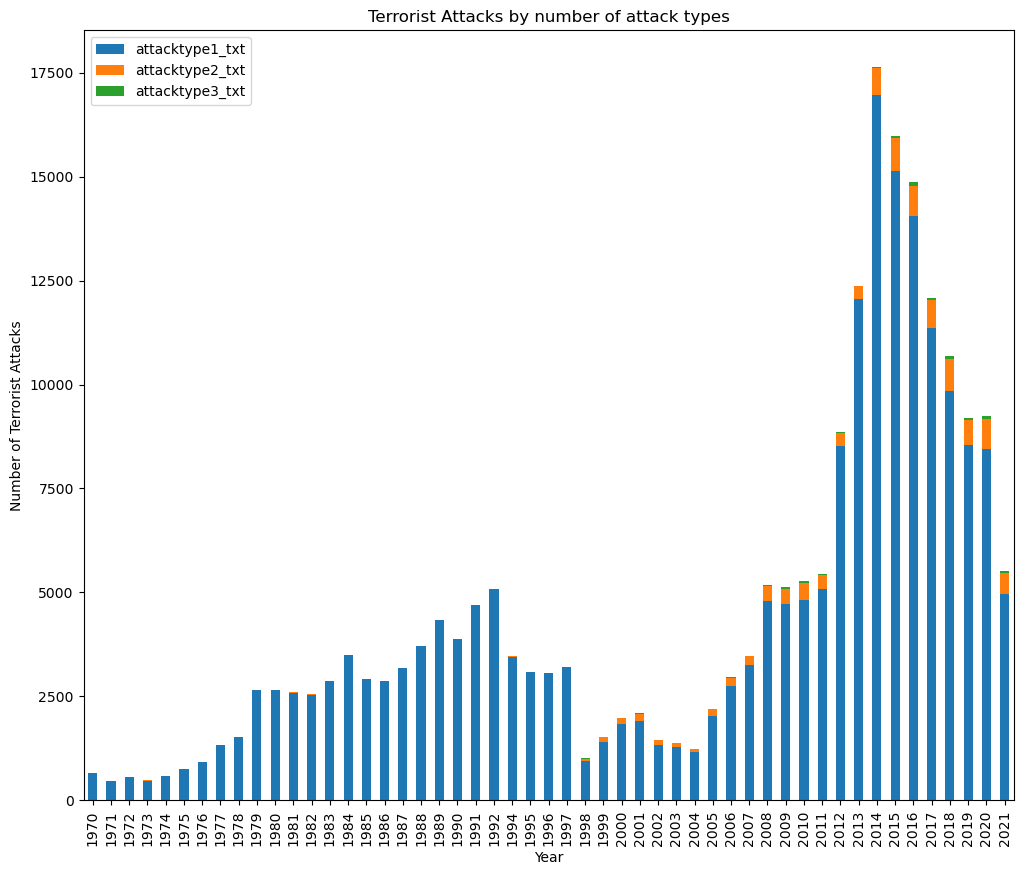

In [32]:
df_3.groupby("iyear").agg({'attacktype1_txt' : 'count', 'attacktype2_txt' : 'count','attacktype3_txt' : 'count'}).plot(
    kind="bar",stacked=True,figsize=(12,10),title="Terrorist Attacks by number of attack types",xlabel="Year",ylabel="Number of Terrorist Attacks")

Since the majority of the terrorist events were made up of only one type of attack method, especially prior to 1998, we first focus on analysing them using only "attacktype1".

Most popular method of attack by year, 1970–2021

In [33]:
most_popular_type_by_year = df_3.groupby(["iyear","attacktype1_txt"]).size().groupby(
    level=0).nlargest(1).reset_index(level=0,drop=True)
most_popular_type_by_year

iyear  attacktype1_txt  
1970   Bombing/Explosion     333
1971   Bombing/Explosion     239
1972   Assassination         265
1973   Assassination         164
1974   Bombing/Explosion     285
1975   Bombing/Explosion     370
1976   Bombing/Explosion     419
1977   Bombing/Explosion     635
1978   Bombing/Explosion     644
1979   Bombing/Explosion    1058
1980   Bombing/Explosion     997
1981   Bombing/Explosion    1082
1982   Bombing/Explosion    1125
1983   Bombing/Explosion    1246
1984   Bombing/Explosion    1776
1985   Bombing/Explosion    1481
1986   Bombing/Explosion    1506
1987   Bombing/Explosion    1477
1988   Bombing/Explosion    1648
1989   Bombing/Explosion    1797
1990   Bombing/Explosion    1731
1991   Bombing/Explosion    1988
1992   Bombing/Explosion    1738
1994   Bombing/Explosion    1153
1995   Bombing/Explosion     791
1996   Bombing/Explosion    1219
1997   Bombing/Explosion    1124
1998   Bombing/Explosion     504
1999   Bombing/Explosion     652
2000   Bombing/Exp

Bombing/Explosion was almost always the most popular method of attack. 

Let us investigate what happened in 1972 and 1973, when assassination was the most popular attack method.

<Axes: title={'center': 'Number of Terrorist Attacks by region, 1992-1993'}, xlabel='Number of Terrorist Attacks', ylabel='Region'>

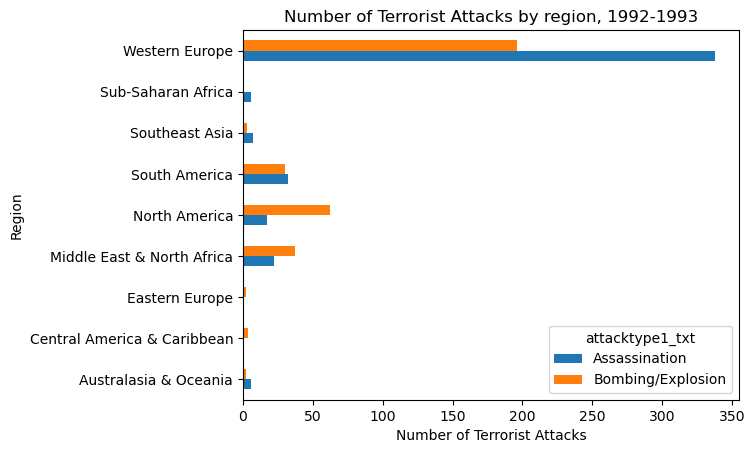

In [34]:
df_3[(df_3["iyear"].isin([1972,1973])) & (df_3["attacktype1_txt"].isin(["Assassination","Bombing/Explosion"]))].groupby(["region_txt","attacktype1_txt"])["eventid"].count().unstack().plot.barh(xlabel="Number of Terrorist Attacks",ylabel="Region",title="Number of Terrorist Attacks by region, 1992-1993")

Let's investigate further. Which Perpetrator Group in Westen Europe caused the most cases of assisination during 1972-1973?

In [35]:
 df_3[(df_3["iyear"].isin([1972,1973])) & (df_3["attacktype1_txt"]=="Assassination") & (df_3["region_txt"]=="Western Europe")].groupby("gname")["eventid"].count().reset_index().sort_values(by="eventid",ascending=False)

,gname,eventid
3,Irish Republican Army (IRA),138
8,Protestant extremists,69
11,Ulster Freedom Fighters (UFF),33
12,Ulster Volunteer Force (UVF),33
2,Black September,26
4,Irish Republican Extremists,11
5,Official Irish Republican Army (OIRA),11
0,Baader-Meinhof Group,4
13,Unknown,4
1,Basque Fatherland and Freedom (ETA),3


The Irish Republican Army (IRA) was very active in the early 1970s.

Top 3 popular methods of attack by year, 1970–2021

In [36]:
most_popular_type_by_year_top3=df_3.groupby(["iyear","attacktype1_txt"]).size().groupby(
level=0).nlargest(3).reset_index(level=0,drop=True)
most_popular_type_by_year_top3

iyear  attacktype1_txt               
1970   Bombing/Explosion                  333
       Facility/Infrastructure Attack     174
       Armed Assault                       61
1971   Bombing/Explosion                  239
       Facility/Infrastructure Attack      88
                                         ... 
2020   Armed Assault                     2112
       Unknown                           1349
2021   Bombing/Explosion                 1828
       Armed Assault                     1292
       Unknown                            603
Length: 153, dtype: int64

Total number of terrorist activities by method from 1970 to 2021 

In [37]:
total_methods_of_attacks = df_3.groupby("attacktype1_txt")["eventid"].count().sort_values(ascending=False).reset_index()
total_methods_of_attacks

,attacktype1_txt,eventid
0,Bombing/Explosion,99986
1,Armed Assault,50845
2,Assassination,21989
3,Hostage Taking (Kidnapping),14493
4,Facility/Infrastructure Attack,12606
5,Unknown,11545
6,Unarmed Assault,1257
7,Hostage Taking (Barricade Incident),1172
8,Hijacking,773


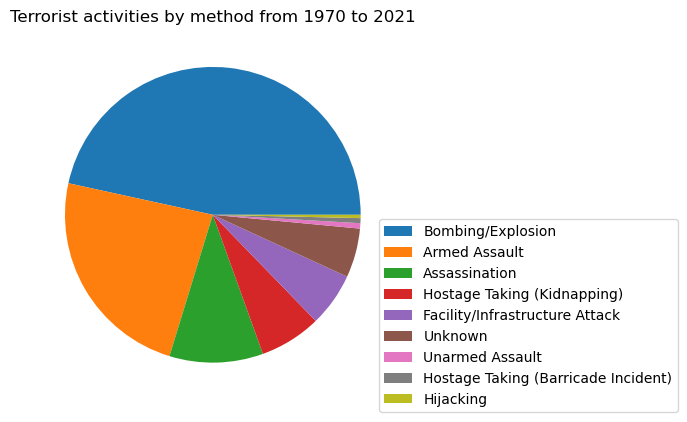

In [38]:
mylabels = total_methods_of_attacks["attacktype1_txt"].tolist()

pie = plt.pie(total_methods_of_attacks["eventid"])
plt.legend(labels=mylabels, bbox_to_anchor=(1.25,0.5), loc="upper right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.title("Terrorist activities by method from 1970 to 2021")

plt.show()

In [39]:
most_popular_type_by_region=df_3.groupby(["region_txt","attacktype1_txt"]).size().groupby(level=0).nlargest(1).reset_index(level=0,drop=True)
most_popular_type_by_region

region_txt                   attacktype1_txt               
Australasia & Oceania        Facility/Infrastructure Attack      112
Central America & Caribbean  Armed Assault                      4370
Central Asia                 Bombing/Explosion                   237
East Asia                    Bombing/Explosion                   341
Eastern Europe               Bombing/Explosion                  2831
Middle East & North Africa   Bombing/Explosion                 35772
North America                Bombing/Explosion                  1581
South America                Bombing/Explosion                  9381
South Asia                   Bombing/Explosion                 25530
Southeast Asia               Bombing/Explosion                  5546
Sub-Saharan Africa           Armed Assault                      8897
Western Europe               Bombing/Explosion                  8680
dtype: int64

In [40]:
attack_1=df_3.groupby(["iyear","attacktype1_txt"])["eventid"].count().reset_index().rename(columns={"attacktype1_txt":"attacks"})
attack_2=df_3.groupby(["iyear","attacktype2_txt"])["eventid"].count().reset_index().rename(columns={"attacktype2_txt":"attacks"})
attack_3=df_3.groupby(["iyear","attacktype3_txt"])["eventid"].count().reset_index().rename(columns={"attacktype3_txt":"attacks"})
attack_types = pd.concat([attack_1,attack_2,attack_3])
attack_types

,iyear,attacks,eventid
0,1970,Armed Assault,61
1,1970,Assassination,22
2,1970,Bombing/Explosion,333
3,1970,Facility/Infrastructure Attack,174
4,1970,Hijacking,11
...,...,...,...
64,2019,Facility/Infrastructure Attack,45
65,2020,Armed Assault,5
66,2020,Facility/Infrastructure Attack,83
67,2021,Armed Assault,4


Now we take all three attack methods into account and see if the result differs.

In [41]:
attack_types.groupby(["iyear","attacks"])["eventid"].sum().reset_index().sort_values(by="eventid",ascending=False).drop_duplicates(subset="iyear").sort_values(by="iyear")

,iyear,attacks,eventid
2,1970,Bombing/Explosion,334
11,1971,Bombing/Explosion,239
18,1972,Assassination,265
26,1973,Assassination,164
36,1974,Bombing/Explosion,285
45,1975,Bombing/Explosion,370
53,1976,Bombing/Explosion,419
62,1977,Bombing/Explosion,635
70,1978,Bombing/Explosion,644
79,1979,Bombing/Explosion,1058


The result remains the same. The most popular method was still Bombing/Explosion for almost all years except 1972 and 1973. 

#### Conclusion: 

Bombing/explosions are by far the most frequent forms of attack. The majority of terrorist acts between 1970 and 2021 were bombing/explosions, with the exception of 1972–1973, when there the number of assassinations soared in Western Europe. In terms of regional differences, Armed assault is more prevalent than Bombing/Explosion in Central America & Caribbean  and Sub-Saharan Africa.

### 4.Plot the locations of attacks on a map to visualize their regional spread

In [42]:
df_4 = df[["eventid","longitude","latitude"]]
df_4.head(10)

,eventid,longitude,latitude
0,197000000001,-69.951164,18.456792
1,197000000002,-99.086624,19.371887
2,197001000001,120.599741,15.478598
3,197001000002,23.762728,37.997490
4,197001000003,130.396361,33.580412
5,197001010002,-89.176269,37.005105
6,197001020001,-56.187214,-34.891151
7,197001020002,-122.225906,37.791927
8,197001020003,-89.412488,43.076592
9,197001030001,-89.386694,43.072950


C:\Users\Nicger\miniconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


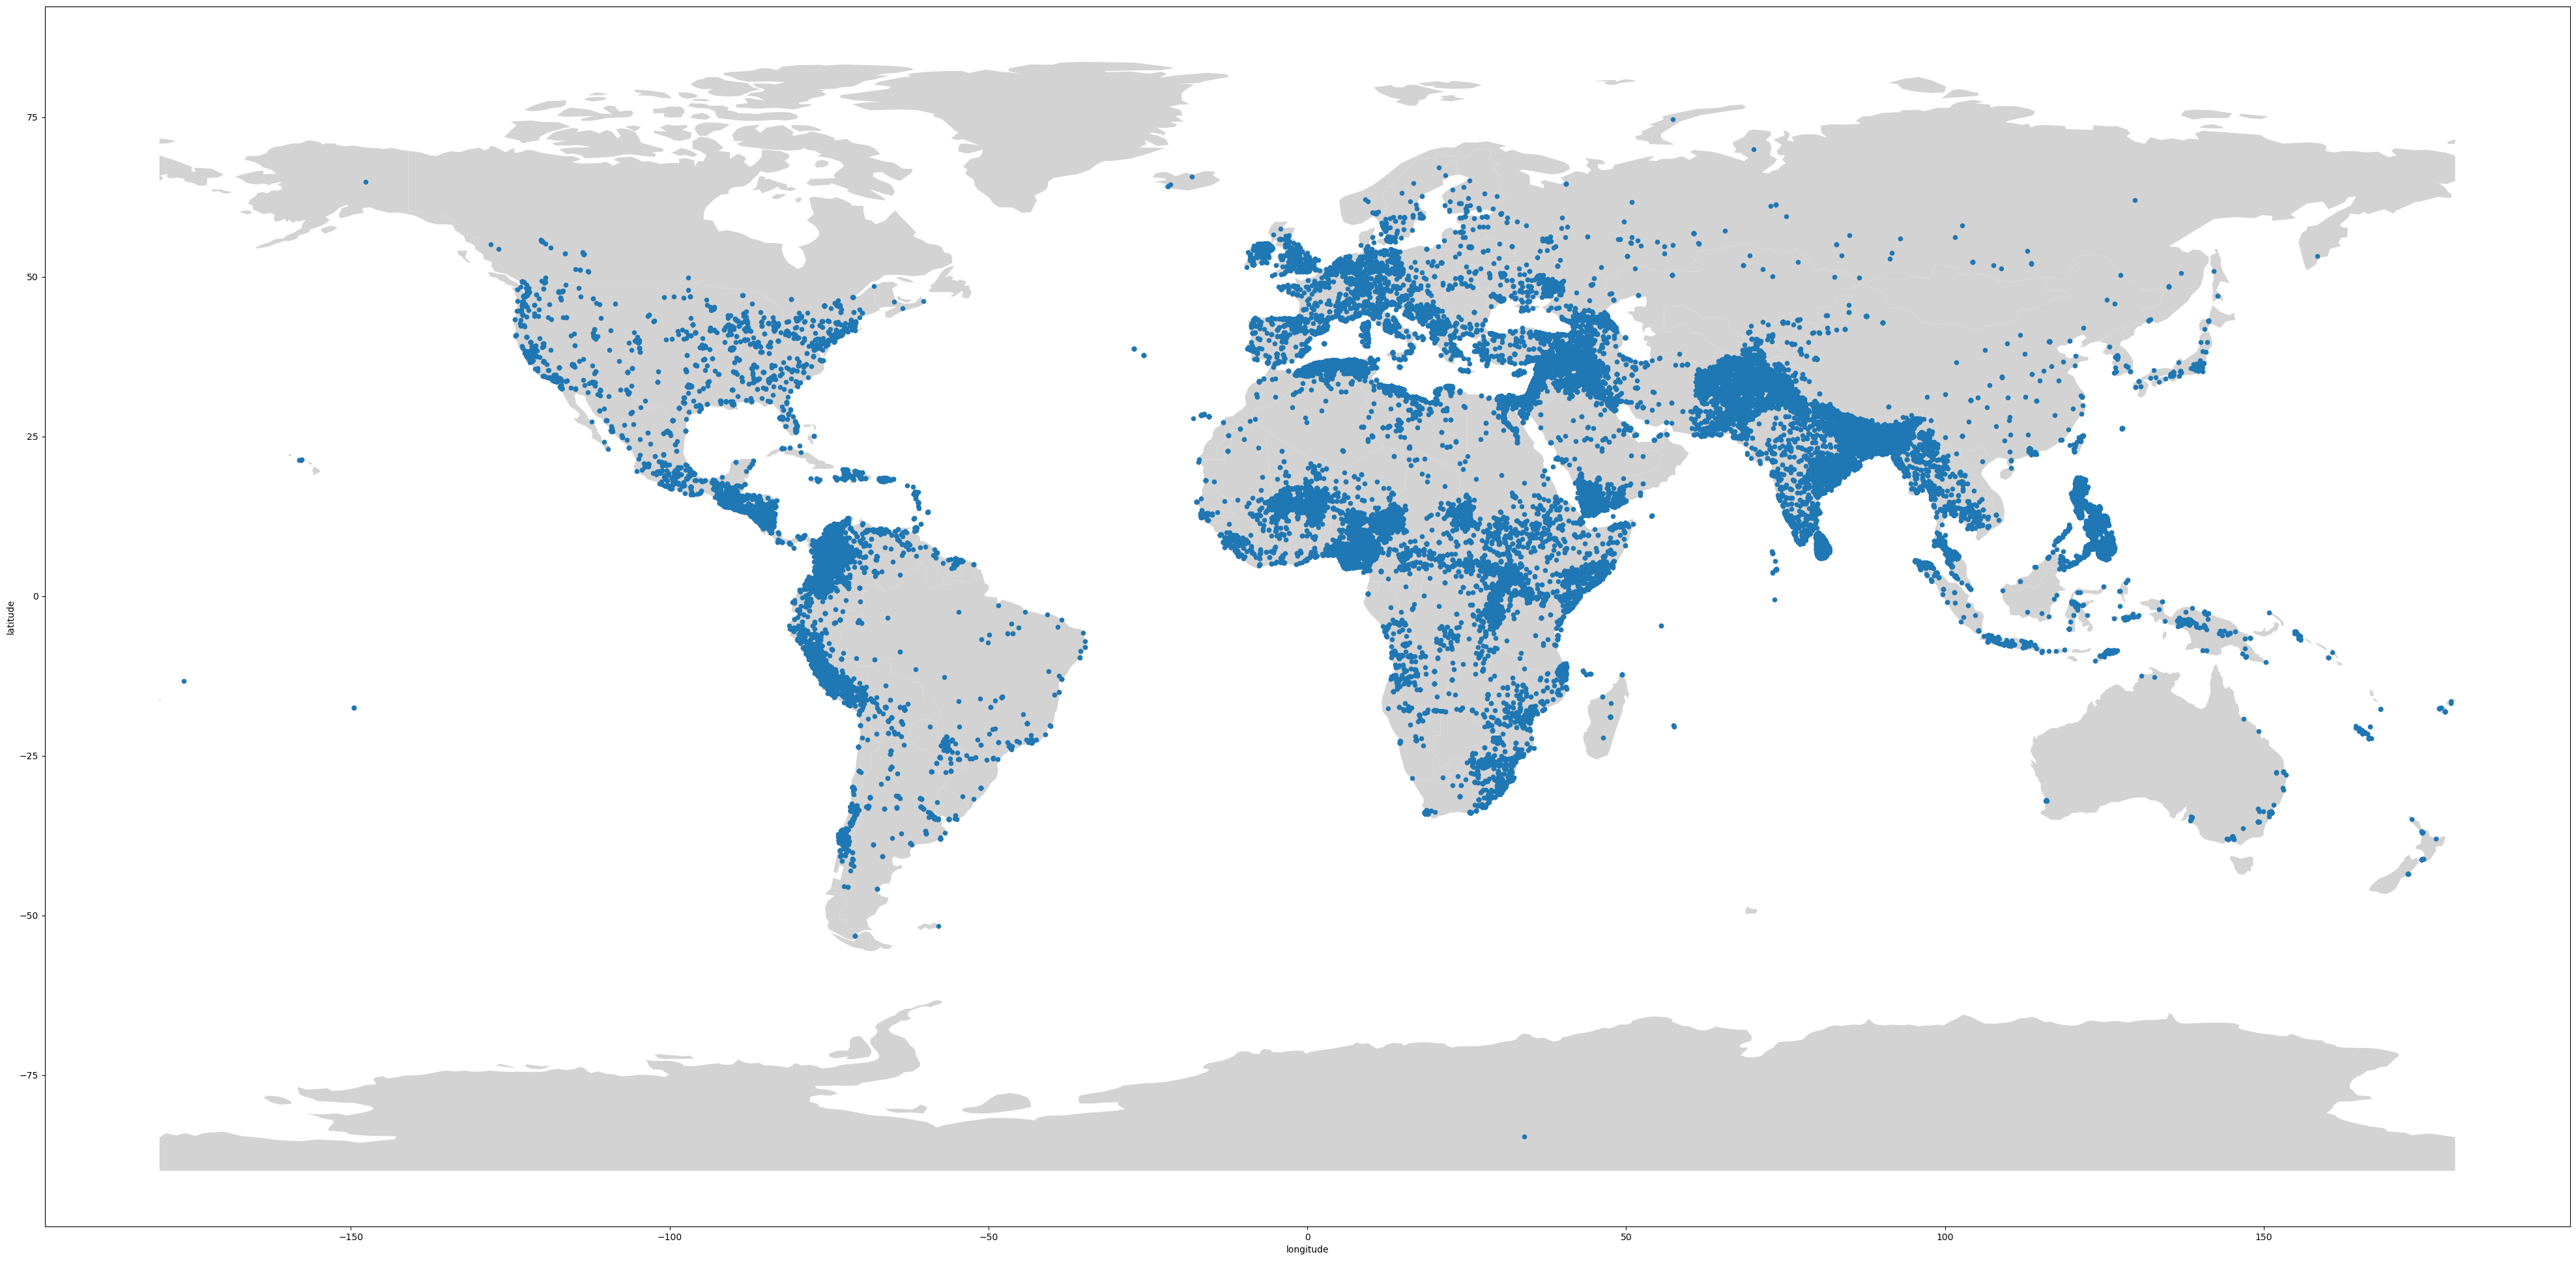

In [43]:
# initialise an axis
fig, ax = plt.subplots(figsize=(50,25))

# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey",ax=ax)

# plot points
df_4.plot(x="longitude", y="latitude", kind="scatter",ax=ax)
plt.show()